# <font style = "color:rgb(50,120,229)">Gradients</font>

## <font style = "color:rgb(50,120,229)">Image Gradients</font> 

We have seen that we can design convolution kernels for blurring an image. We can also design a kernel that fires on sharp intensity discontinuities. 

**The directional change in intensity of pixels is called gradient.**

The easiest way to understand gradients is to look at a few examples. Below is a piece of modern art created by yours truly. I have marked several locations on my art work with bright red dots and labeled them. 

![Image Gradients](https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.2-pixelIntensity.png)
    
Consider a small 3x3 neighborhood around pixels A and B. All pixels in the neighborhood are of the same color. It is a flat region with no intensity change. In other words, the gradient is 0 in such regions. 

Now consider pixel C. The intensity changes abruptly from left to right, so we say that pixel C has a high positive gradient in x-direction. Similarly, pixel D has a high positive gradient in y-direction. Note that the y-axis is from the top left to bottom left edge of the image. 

Pixel E is similar to pixel C, but the intensity change is from white to black. The gradient is therefore negative in the x-direction. Similarly, pixel F has a negative gradient in the y-direction. 

Most of the gradients we have seen so far are maximum gradients from complete black to complete white. But in most pixels of a natural image, gradients are more subtle. In pixels G and I, we have gradients in the x- and y-directions, respectively, but they are quite subtle. 

A single pixel can have both X and Y Gradients. For example, there is a non-zero gradient at pixel H in both x- and y-directions. 

In color images, gradients are calculated for every channel separately. So at every pixel, we have six numbers representing the gradient --- ($r_x$ , $g_x$, $b_x$) and ($r_y$ , $g_y$, $b_y$). That said, in many applications we do not need color gradients. In those cases, color images are converted to grayscale and gradients are calculated using the grayscale image. 

# <font style="color:rgb(50,120,229)">First Order Derivative Filters </font>

## <font style = "color:rgb(50,120,229)">Prewitt Filter</font>

Knowing what gradients are, we can guess what kind of filter will help us calculate the X and Y Gradients. 

Let us now focus on the X Gradient first and the logic will extend to the Y Gradient as well. For the X Gradient at a pixel, we want to find the **difference in intensity** to the right and to the left of the current pixel.The following convolution filter achieves that. 

\begin{bmatrix}
-1 & 0 &1
\end{bmatrix}

Can we improve the above gradient estimate? First, it calculates the difference between just two pixels. As a rule of thumb, when we do calculations based on a small number of pixels, our estimates are noisy. So the above filter can be enlarged to calculate the gradient over a 3x3 patch instead of over a line. The filters below provide a slightly less noisy version of the gradients in the x- and y-directions. 

$$
\begin{bmatrix}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1
\end{bmatrix}
\quad
\quad
\quad
\quad
\quad
\quad
\begin{bmatrix}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1
\end{bmatrix}
$$

The above filters are called the **Prewitt filters.** By now, some of you may be wondering if image X and Y Gradients are the x and y derivatives of the image. And yes, they are exactly that. 

# <font style = "color:rgb(50,120,229)">Sobel Filter</font>

To make gradient calculations even more robust and noisefree, the image can be Gaussian-blurred slightly before applying a gradient filter. As you know, blurring is also a convolution operation. So applying a Gaussian blur filter before applying the gradient filter would require two convolution operations. 

Wouldn’t it be cool if we could use just one convolution operation that would implicitly blur and then calculate the gradient operations? We are in luck! Convolution is associative. Therefore, it is possible to combine the two convolution operations into one. 

This where the **Sobel Filters** come in. They perform Gaussian smoothing implicitly.  The Sobel filters for X Gradient and Y Gradient calculations are shown below. 

$$
\begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}
\quad
\quad
\quad
\quad
\quad
\quad
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{bmatrix}
$$

## <font style = "color:rgb(50,120,229)">Magnitude and Direction of Gradient</font>

As you can see, we have two different gradients -- the gradient in the x-direction $I_x$ and the gradient in the y-direction, $I_y$ . You can think of the gradient as the a-vector with x and y components. The combined strength of the X and Y Gradients is given by the magnitude of gradient, using the formula below. 
$$
G = \sqrt {I^2_x + I^2_y}
$$

The direction of the gradient is given by 

$$
\theta = \arctan \frac{I_y}{I_x}
$$

<font style = "color:rgb(255,0,0)">**Note:**</font> The magnitude and direction of gradient is calculated at every pixel. $I_x$ and $I_y$ are the images obtained by running the Sobel filters for X and Y Gradients of the image.

## <font style = "color:rgb(50,120,229)">Sobel Gradients Code & Tutorial</font>

OpenCV provides a [**`Sobel`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d) function for calculating the X and Y Gradients. Below, you can see the most common usage.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.Sobel(	src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]	)
```

**Parameters**

- **`src`**	input image.
- **`dst`**	output image of the same size and the same number of channels as src .
- **`ddepth`**	output image depth,in the case of 8-bit input images it will result in truncated derivatives.
- **`dx`**	order of the derivative x.
- **`dy`**	order of the derivative y.
- **`ksize`**	size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
- **`scale`**	optional scale factor for the computed derivative values; by default, no scaling is applied.
- **`delta`**	optional delta value that is added to the results prior to storing them in dst.
- **`borderType`**	pixel extrapolation method.

Let us go over the following tutorial and see the code in action.

### <font style = "color:rgb(8,133,37)">Sobel Filter Example</font>

Sobel function can be used with color images, but to keep things simple, we are reading the image as grayscale.

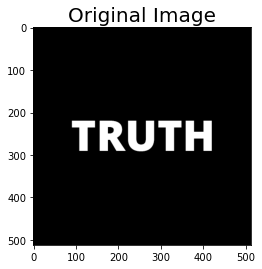

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['axes.titlesize'] = 20

filename = "data/images/truth.png"

image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if image is None:  
    print("Could not open or find the image")

plt.imshow(image)
plt.title("Original Image")
plt.show()

The X and Y Gradients are calculated using the Sobel function. Note that the depth of the output images is set to `CV_32F` because gradients can take negative values.

In [2]:
# Apply sobel filter along X direction
sobel_x = cv2.Sobel(image, cv2.CV_32F, dx=1, dy=0)

# Apply sobel filter along Y direction
sobel_y = cv2.Sobel(image, cv2.CV_32F, dx=0, dy=1)

# Apply sobel filter along X & Y direction
sobel_xy = cv2.Sobel(image, cv2.CV_32F, dx=1, dy=1)

For display purposes, the image is normalized by scaling and shifting so that all pixel values lie between 0 and 1.

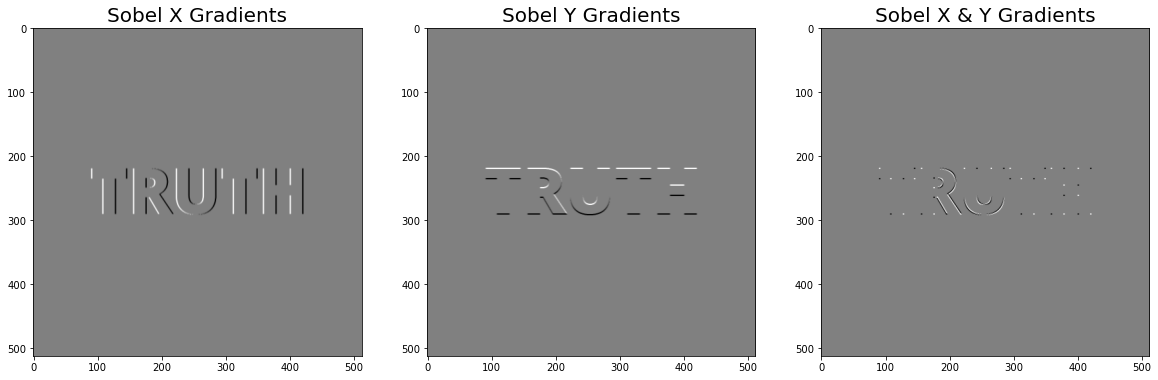

In [3]:
# Normalize each Sobel Result for displaying
# Sobel X
cv2.normalize(sobel_x,
              dst = sobel_x,
              alpha = 0,
              beta = 1,
              norm_type = cv2.NORM_MINMAX,
              dtype = cv2.CV_32F)
# Sobel Y
cv2.normalize(sobel_y,
              dst = sobel_y,
              alpha = 0,
              beta = 1,
              norm_type = cv2.NORM_MINMAX,
              dtype = cv2.CV_32F)
# Sobel XY
cv2.normalize(sobel_xy,
              dst = sobel_xy,
              alpha = 0,
              beta = 1,
              norm_type = cv2.NORM_MINMAX,
              dtype = cv2.CV_32F)

plt.figure(figsize=(20,10))
plt.subplot(131);plt.imshow(sobel_x);plt.title("Sobel X Gradients", fontsize=20)
plt.subplot(132);plt.imshow(sobel_y);plt.title("Sobel Y Gradients", fontsize=20)
plt.subplot(133);plt.imshow(sobel_xy);plt.title("Sobel X & Y Gradients", fontsize=20)
plt.show()

<br><br><br>

# <font style = "color:rgb(50,120,229)">Second Order Derivative Filters</font>

We know that the Sobel operator calculates the first derivative in the x- and y-directions. When the intensity changes abruptly, the Sobel filter response fires up, so the response of the Sobel filter can be used as an edge detector. 

However, first derivative operators (like the Sobel operators) are not the only way to detect edges. Second derivative operators have a zero crossing at the location of the edges.

![Second Order Derivative Filters](https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.2-secondOrderDerivative.png)

In the image above, we see the effects of first and second derivatives in the 1-d case. A 1-d edge is shown in black. Notice, the first derivative curve, shown in green, has a maximum at the location of the edge. The second derivative, shown in blue, has a zero crossing at the location of the edge. This fact is used to recognize edges.

## <font style = "color:rgb(50,120,229)">Laplacian Filter</font>

The [Laplacian](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html#laplacian) is a filter that is based on the second derivative. 

Mathematically, the Laplacian operator or filter is given by

$$
L(x,y) = \frac{\partial^2 I }{\partial^2 x} +  \frac{\partial^2 I }{\partial^2 y}
$$

I have to admit, that looks scary. But fortunately, after the mathematicians did their math, they told us the above expression reduces to the simple convolution kernel shown below. 

$$
\begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}
$$


The Laplacian filter is very sensitive to noise and therefore it is important to smooth the image before applying it. 

**<font style = "color:rgb(255,0,0)">Note:</font>** As a rule of thumb, **summing and averaging operations are less affected by noise, and differencing operations are greatly affected by noise**. Here is a simple example. 

Let us consider two numbers. One is supposed to be 10 and the other is supposed to be 11, but because of a noise, the second number is recorded as 12. Now, the true difference between the numbers is 11 - 10 = 1. But because of noise, the difference is 12  - 10 = 2. So we have made a mistake of 100% while calculating the difference! 

On the other hand, the true sum of the two numbers is 11 + 10 = 21, but because of noise we estimate it to be 12 + 10 = 22. The error is ( 22 - 21 ) / 21 = 4.76%. 

So, while calculating derivatives we have to worry about noise, but while calculating integrals we don’t have to worry about noise. 

### <font style = "color:rgb(8,133,37)">Laplacian Filter in OpenCV</font>

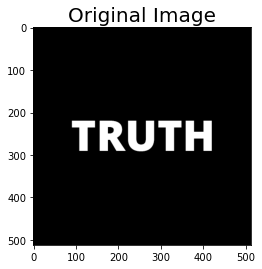

In [4]:
img = cv2.imread("data/images/truth.png", cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if image is None:  
    print("Could not open or find the image")

plt.imshow(img)
plt.title("Original Image")
plt.show()

Apply laplacian function on the image after gaussian blurring. Note that the depth of the output images is set to `CV_32F` because gradients can take negative values

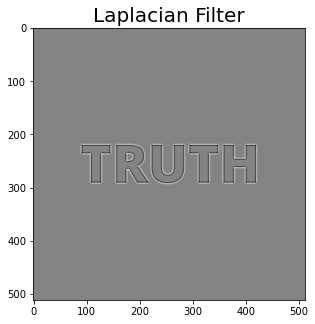

In [5]:
kernelSize = 3

# Applying GaussianBlur
img_gaus = cv2.GaussianBlur(img, (3,3), 0, 0)

# Applying Laplacian to the Gaussian blurred image
img_laplacian = cv2.Laplacian(img_gaus, cv2.CV_32F, ksize = kernelSize,
                              scale=1, delta=0)

# Normalize result
cv2.normalize(img_laplacian, dst = img_laplacian,
              alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX,
              dtype = cv2.CV_32F)

# Visualize Result
plt.figure(figsize=(10,5))
plt.imshow(img_laplacian)
plt.title("Laplacian Filter")
plt.show()

You can easily make out the edges from the above laplacian image.

<br><br>

# <font style = "color:rgb(50,129,229)">Application - Image Sharpening</font>

In sharpening we want to enhance the edges and bring out more of the underlying texture. Although, sharpening can be performed using a single convolution filter, it is easy to understand it in terms an old photo enhancement technique called **unsharp** **masking**. This technique was developed back in the 1930s in Germany. It is fascinating to see the hacks people used back in those days to get a good photo. Wikipedia has the [story](https://en.wikipedia.org/wiki/Unsharp_masking).

Fortunately, it is much easier for us to achieve unsharp masking digitally. 

1. **Step 1**: Blur the image to smooth out texture. The blurred image contains low frequency information of the original image. Let $I$ be the original image and $I_b$ be the blurred image. 

2. **Step 2**: Obtain the high frequency information of the original image by subtracting the blurred image from the original image. 

3. **Step 3**: Now, put back the high frequency information back in the image and control the amount using a parameter. The final sharpened image is therefore, 

    $$I_s = I + \alpha  ( I − I_b) $$

The figure below shows the three stages of unsharp masking

| <center><img src="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.2-originalGray.png" width =330 /></center> | <center><img src="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.2-BlurredImage.png" width=330 /></center> | <center><img src="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.2-SharpenedImage.png" width=330/></center> |
| -------- | -------- | -------- |
| <center>Original Image</center>    | <center>Blurred Image</center>     | <center>Sharpened Image</center>     |

In practice, sharpening is implemented using a simple sharpening kernel that approximates the above behavior. All you need to do is convolve the image with the following kernel


$$
\begin{bmatrix}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{bmatrix}
$$


The above kernel is obtained using $\alpha=1$ and approximating $(I-I_b)$ using the Laplacian kernel. 

$$
\begin{bmatrix}
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{bmatrix}
\quad
\quad
+
\quad
\quad
\begin{bmatrix}
0 & -1 & 0\\
-1 & 4 & -1\\
0 & -1 & 0
\end{bmatrix}
$$

### <font style = "color:rgb(8,133,37)">Image Sharpening using kernel</font>

The following tutorial implements image sharpening as a simple convolution operation.

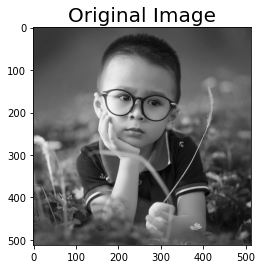

In [6]:
filename = "data/images/sample.jpg"

img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if img is None:  
    print("Could not open or find the image")

plt.imshow(img)
plt.title("Original Image")
plt.show()

The sharpening kernel is defined using double as the datatype so as to prevent overflow.

### <font style="color:rgb(8,133,37)">Define the Kernel </font>

In [7]:
# Sharpen kernel
sharpen_kernel = np.array(
    ([0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]), dtype='int')

Next, `filter2D` is used to perform the convolution.

The third parameter (depth) is set to `-1` which means the bit-depth of the output image is the same as the input image. So if the input image is of type `CV_8UC3`, the output image will also be of the same type.

### <font style="color:rgb(8,133,37)">Apply convolution </font>

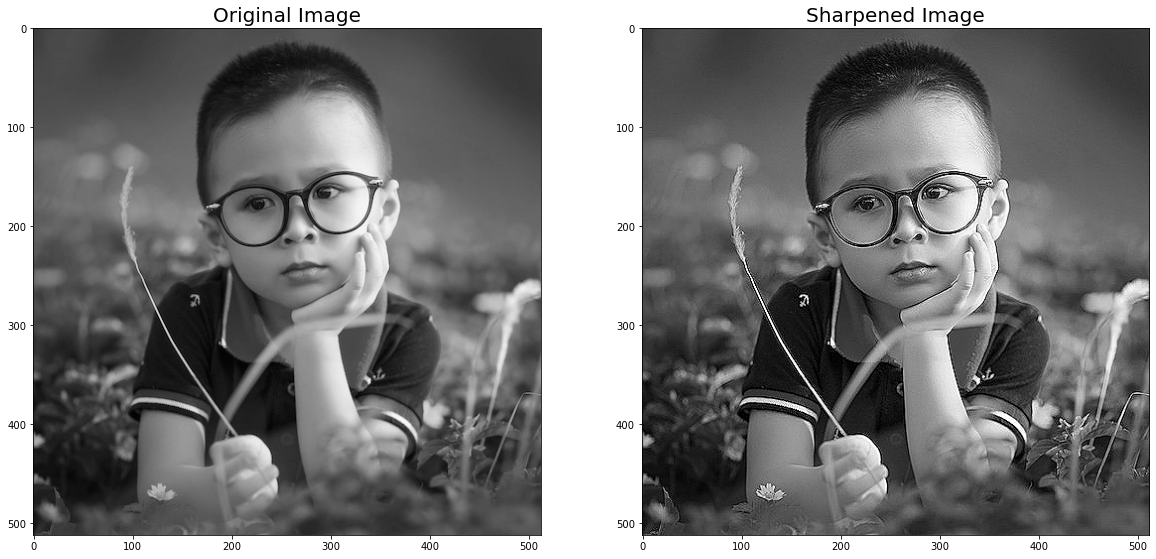

In [8]:
# Using 2D filter by applying the sharpening kernel
sharpen_img = cv2.filter2D(img, -1, sharpen_kernel)

# Visualize Result
plt.figure(figsize=(20, 10))
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(sharpen_img[...,::-1]);plt.title("Sharpened Image")
plt.show()

You can observe how the result of sharpening accentuates the high frequency components ( edges, hariline etc ).